# Let's do an Exploratory data analysis on IMDB MOVIES DATASET

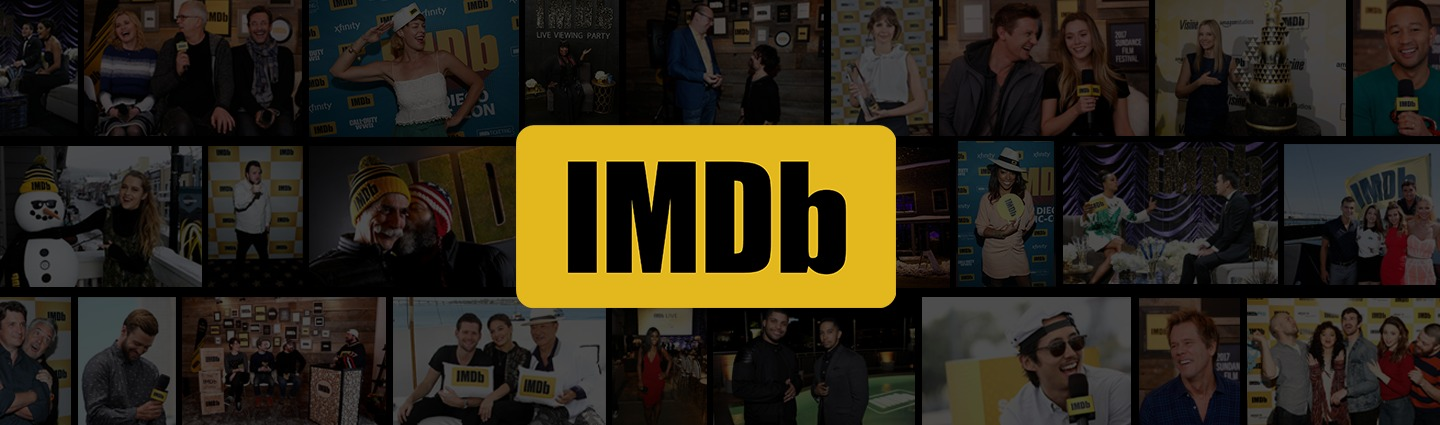

## Importing Libraries


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Loading our dataset 
df = pd.read_csv("/Users/macbook/Documents/datasets/datasets for projects/IMDB-Movie-Data3.csv")

In [78]:
# Creating copy of our data
df_copy = df.copy()

# Basic Overview of data

In [79]:
# Checking first 5 rows
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [82]:
# Key information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [83]:
# shape of our dataset
df.shape

(1000, 12)

In [84]:
# Mathematical summary of our data
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [85]:
# Duplicate values
df.duplicated().sum()

0

In [86]:
# correlation
df.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [87]:
# % of Missing values
(df_copy.isnull().sum()/1000)*100

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

<AxesSubplot:>

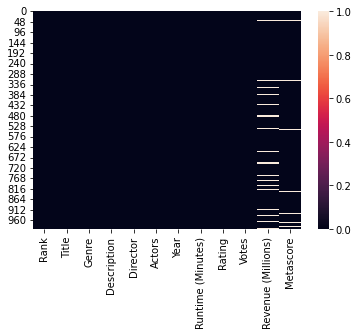

In [88]:
# Visualizing missing values
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Density'>

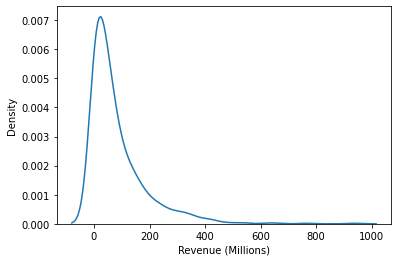

In [89]:
# Checking distribution of data
sns.kdeplot(df_copy['Revenue (Millions)'])

In [90]:
# Distribution of data is not normal. Filling missing values with median would be better. 

In [91]:
# Filling missing values in revenue column by median. 
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median(), inplace=True)


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Density'>

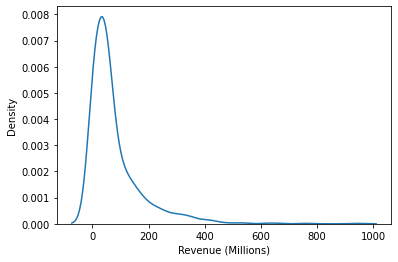

In [92]:
sns.kdeplot(df['Revenue (Millions)'])

<AxesSubplot:xlabel='Metascore', ylabel='Density'>

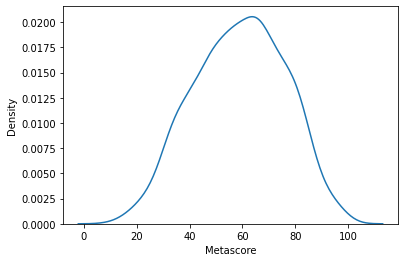

In [93]:
# Distribution of metascore
sns.kdeplot(df_copy['Metascore'])

In [94]:
# Dropping missing values by filling with mean 
df['Metascore'].fillna(df['Metascore'].mean(),inplace=True)

<AxesSubplot:xlabel='Metascore', ylabel='Density'>

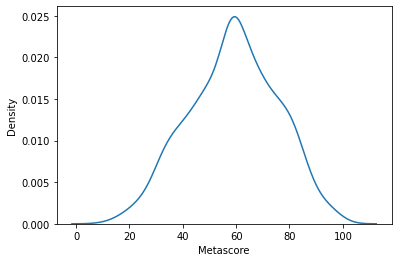

In [95]:
sns.kdeplot(df['Metascore'])

In [54]:
# Final Check for missing values
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

## Data is clean.

# Exploratory data analysis

In [96]:
# Highest Grossing movie with title
df.groupby('Title')['Revenue (Millions)'].nlargest().sort_values(ascending=False).head(1)

Title                                         
Star Wars: Episode VII - The Force Awakens  50    936.63
Name: Revenue (Millions), dtype: float64

In [97]:
# Year with highest average voting
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Votes vs Year')

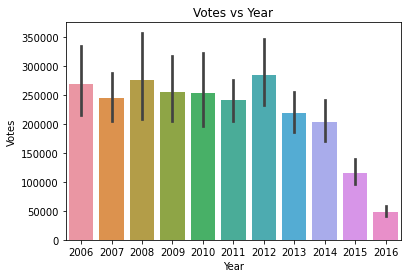

In [98]:
# Plotting bar plot to visualize the voting w.r.t year
sns.barplot(x = 'Year', y = 'Votes', data=df)
plt.title('Votes vs Year')

In [99]:
# Average Revenue per year
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2012    107.973281
2009    107.533333
2010    102.226750
2008     98.100096
2011     86.983254
2013     85.831593
2007     84.871132
2006     84.555227
2014     83.564694
2015     75.007165
2016     52.613704
Name: Revenue (Millions), dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Revenue (Millions)'>

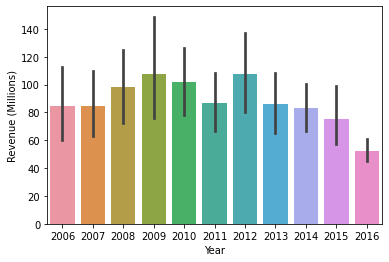

In [100]:
sns.barplot(x = 'Year', y = 'Revenue (Millions)', data=df)

In [101]:
# Average rating for Directors
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
Shawn Burkett        2.70
James Wong           2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

In [102]:
# Top 10 lengthy movies
top10_len = df.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']].set_index('Title')
top10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


Text(0.5, 1.0, 'Top 10 Lengthy movies')

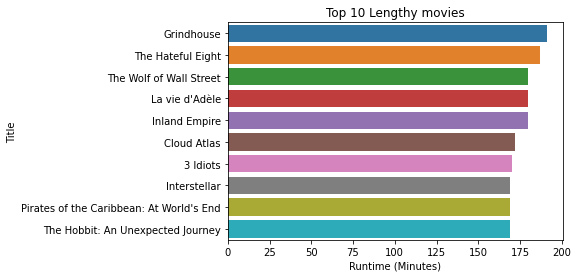

In [103]:
sns.barplot(x = 'Runtime (Minutes)', y = top10_len.index, data=top10_len)
plt.title('Top 10 Lengthy movies')

In [104]:
# Movie Releases per Year
df['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

Text(0.5, 1.0, 'Number of movies per year')

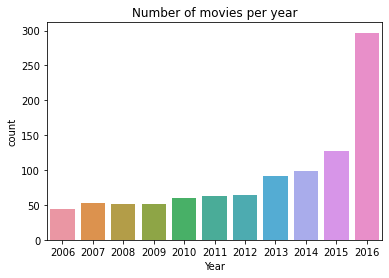

In [105]:
sns.countplot(x='Year', data=df)
plt.title('Number of movies per year')

In [106]:
# Highest revenue earning Movie complete information 
df[df['Revenue (Millions)'].max() == df['Revenue (Millions)']]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [107]:
# Movie title with highest rating, director
df.nlargest(10, 'Rating')[['Title', 'Rating','Director']]

,Title,Rating,Director
54,The Dark Knight,9.0,Christopher Nolan
80,Inception,8.8,Christopher Nolan
117,Dangal,8.8,Nitesh Tiwari
36,Interstellar,8.6,Christopher Nolan
96,Kimi no na wa,8.6,Makoto Shinkai
249,The Intouchables,8.6,Olivier Nakache
64,The Prestige,8.5,Christopher Nolan
99,The Departed,8.5,Martin Scorsese
124,The Dark Knight Rises,8.5,Christopher Nolan
133,Whiplash,8.5,Damien Chazelle


In [108]:
# Actors with high ratings
df.groupby(['Actors','Title'])['Rating'].max().head(10)

Actors                                                                         Title         
Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani                            PK                8.2
Aamir Khan, Madhavan, Mona Singh, Sharman Joshi                                3 Idiots          8.4
Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,Sanya Malhotra                   Dangal            8.8
Aaron Paul, Dominic Cooper, Imogen Poots, Scott Mescudi                        Need for Speed    6.5
Aaron Poole, Kenneth Welsh,Daniel Fathers, Kathleen Munroe                     The Void          5.8
Aaron Taylor-Johnson, Chloë Grace Moretz,Christopher Mintz-Plasse, Jim Carrey  Kick-Ass 2        6.6
Aaron Taylor-Johnson, Elizabeth Olsen, Bryan Cranston, Ken Watanabe            Godzilla          6.4
Aaron Taylor-Johnson, Nicolas Cage, Chloë Grace Moretz, Garrett M. Brown       Kick-Ass          7.7
Aaron Taylor-Johnson, Taylor Kitsch, Blake Lively,Benicio Del Toro             Savages           6

In [109]:
# Top 10 directors with succesful movies
df.groupby('Director')['Revenue (Millions)'].max().sort_values(ascending=False).head(10)

Director
J.J. Abrams          936.63
James Cameron        760.51
Colin Trevorrow      652.18
Joss Whedon          623.28
Christopher Nolan    533.32
Gareth Edwards       532.17
Andrew Stanton       486.29
Francis Lawrence     424.65
Gore Verbinski       423.03
Lee Unkrich          414.98
Name: Revenue (Millions), dtype: float64

In [110]:
# Which type of movies are getting high rating
df.groupby('Genre')['Rating'].max().sort_values(ascending=False).head(10)

Genre
Action,Crime,Drama         9.0
Action,Adventure,Sci-Fi    8.8
Action,Biography,Drama     8.8
Biography,Comedy,Drama     8.6
Animation,Drama,Fantasy    8.6
Adventure,Drama,Sci-Fi     8.6
Crime,Drama,Thriller       8.5
Action,Thriller            8.5
Drama,Music                8.5
Drama,Mystery,Sci-Fi       8.5
Name: Rating, dtype: float64

In [111]:
# Top 10 directors with flop movies
df.groupby('Director')['Revenue (Millions)'].min().sort_values().head(10)

Director
Andy Goddard        0.00
So Yong Kim         0.01
Christian Ditter    0.01
Patricia Rozema     0.01
Phillip Guzman      0.01
Robin Swicord       0.01
Jon Kasdan          0.02
Oz Perkins          0.02
Jim Mickle          0.02
Gus Van Sant        0.02
Name: Revenue (Millions), dtype: float64

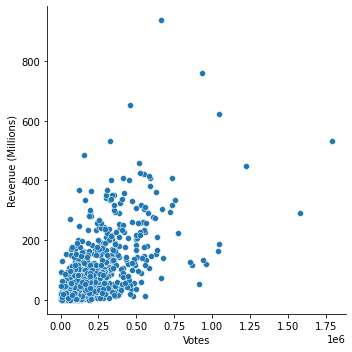

In [112]:
# Let's see a relationship of Revenue and Votes
sns.relplot(x = 'Votes', y = 'Revenue (Millions)', kind='scatter', data=df)